In [ ]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8')) + 127
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    print ('Your tasks are 1.{}, 2.{}'.format(task1, task2))

##1.2

Архив записей https://www.kaggle.com/rtatman/speech-accent-archive

Требуется:

Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке.
Получить сумму zero-crossing по каждой из записей
Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15. Дискретность признака zero-crossing игнорировать. Учитывать также межфакторное взаимодействие.

Ссылки 

https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

https://reneshbedre.github.io/blog/anova.html



In [ ]:
!wget -x --load-cookies cookies.txt "https://www.kaggle.com/rtatman/speech-accent-archive/download" -O data.zip

--2020-05-15 22:54:13--  https://www.kaggle.com/rtatman/speech-accent-archive/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-data-sets/4114/6391/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589842453&Signature=q81IQKFKlU3mHx27OIwItNU2vV2IyALx1EP9nurr%2BDn7KJ79Y%2FvGA4yJDZS7bVt2vYDrFx3Uoj9hyibe3dvtTF9rMtRaUzQvmuOI2HV8HpexYO1tVVa2BFxQLXnr6xVR86MMbDrkHVRV40qV4M4G1izkNvy5GFDKfOGe229oEPU7TW2of%2F6qhPdWOfufTe5AQNGXVfPIPsx2IstrF3uf%2FEYGNKgC8psad%2BHn6SHU625HhTClDVUsp5tdp5oaUZIhcSpoLFjFQdyfq0PSsRXHqr3OweMIEFrWHQuJwT4GvAa48hD8SwN06QQXW%2B1lHOn4lucGAXyYUP7EcAWrYDlocQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dspeech-accent-archive.zip [following]
--2020-05-15 22:54:13--  https://storage.googleapis.com/kaggle-data-sets/4114/6391/bundle/arch

In [ ]:
!unzip data.zip

In [ ]:
import pandas as pd

names = pd.read_csv('speakers_all.csv', sep=',')
names.rename(columns={"file_missing?" : "file_missing"}, inplace=True)

In [ ]:
count = names.pivot_table(index=['country'], aggfunc='size')
count[count >= 30]

country
australia        33
belgium          36
brazil           39
canada           54
china            88
ethiopia         31
germany          32
india            59
italy            32
poland           34
russia           31
saudi arabia     33
south korea      51
turkey           35
uk               67
usa             393
dtype: int64

In [ ]:
items = names.country.value_counts().to_dict().items()
data = names[['age', 'filename', 'native_language', 'sex', 'speakerid', 'country', 'file_missing']][names.country.isin([key for key, val in items if val >= 30])]
data

,age,filename,native_language,sex,speakerid,country,file_missing
9,73.0,hawai'i,hawai'i,male,1675,usa,True
10,69.0,hawai'i,hawai'i,female,1676,usa,True
20,25.0,poonchi1,poonchi,male,425,india,True
50,20.0,amharic1,amharic,female,6,ethiopia,False
51,29.0,amharic10,amharic,female,998,ethiopia,False
...,...,...,...,...,...,...,...
2157,23.0,xiang4,xiang,female,2163,china,False
2158,19.0,yakut1,yakut,female,1252,russia,False
2161,78.0,yiddish2,yiddish,female,405,canada,False
2162,52.0,yiddish3,yiddish,male,1161,usa,False


Для дальнейшей работы выбраны данные тех стран, у которых >= 30 аудиозаписей в базе данных. Родной язык спикеров может отличаться от языка страны, в выборке которой он присутствует.

##Zero-crossing

Посчитаем zero-crossing для людей, у которых имеются записи голоса в таблице и добавим полученные результаты в исходный DataFrame

In [ ]:
import librosa

In [ ]:
zero_crossing = []
for i in range(len(data)):
    data_i = data.iloc[i]
    #print(data_i[3])
    if data_i[3] == False:
        audio_path = "recordings/recordings/" + data_i[0] + ".mp3"
        x, sr = librosa.load(audio_path)
        zero_crossings = librosa.zero_crossings(x, pad=False)
        zero_crossing.append(sum(zero_crossings))
        print('{} - zero-crossing of speaker №{}, {}'.format(sum(zero_crossings), data_i[1], data_i[2]))

67648 - zero-crossing of speaker №6, ethiopia
73605 - zero-crossing of speaker №998, ethiopia
80432 - zero-crossing of speaker №1129, ethiopia
64450 - zero-crossing of speaker №1130, ethiopia
103724 - zero-crossing of speaker №1131, ethiopia
56741 - zero-crossing of speaker №1515, ethiopia
64162 - zero-crossing of speaker №1516, ethiopia
87006 - zero-crossing of speaker №1854, ethiopia
84075 - zero-crossing of speaker №1906, ethiopia
80077 - zero-crossing of speaker №2017, ethiopia
92366 - zero-crossing of speaker №2132, ethiopia
123351 - zero-crossing of speaker №7, ethiopia
146000 - zero-crossing of speaker №2135, ethiopia
44570 - zero-crossing of speaker №8, ethiopia
255556 - zero-crossing of speaker №9, ethiopia
138389 - zero-crossing of speaker №10, ethiopia
97494 - zero-crossing of speaker №985, ethiopia
76620 - zero-crossing of speaker №989, ethiopia
231038 - zero-crossing of speaker №990, ethiopia
67797 - zero-crossing of speaker №991, ethiopia
99051 - zero-crossing of speaker 

In [ ]:
data['zero_crossing'] = [0, 0, 0] + zero_crossing
#len(zero_crossing)

##ANOVA

Проведем дисперсионный анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15.

Однофакторный дисперсионный анализ

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Посмотрим на распределение данных для мужчин и женщин. Для наглядности взяты значения из выборки для людей до 30 лет

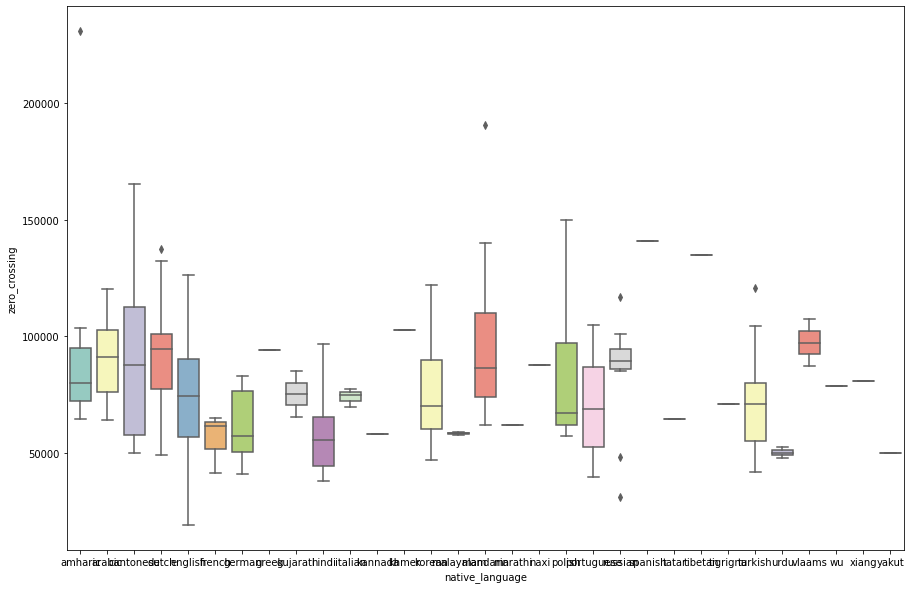

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.boxplot(x='native_language', y='zero_crossing', data=data[(data['age'] <= 30)&(data['sex'] == 'female')], palette="Set3")
plt.show()

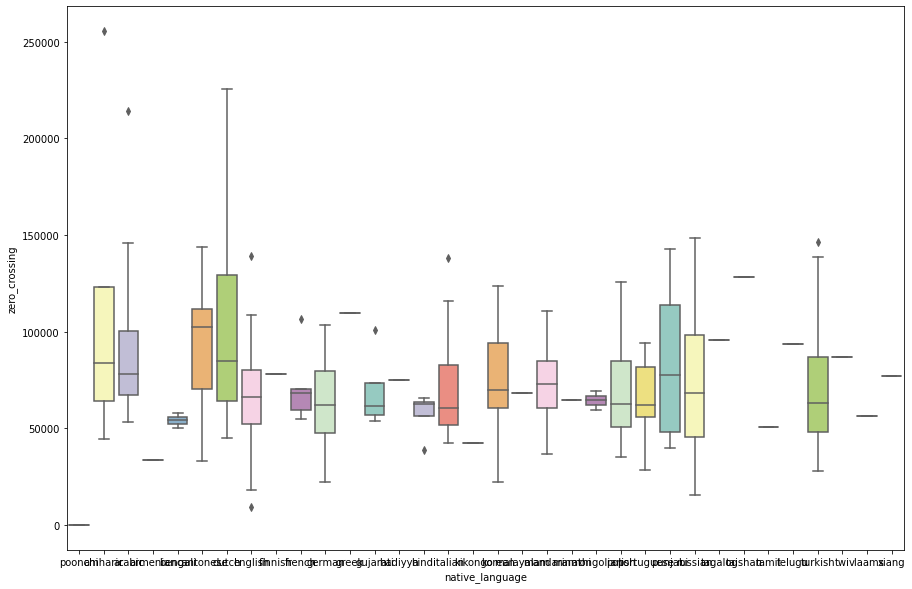

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='native_language', y='zero_crossing', data=data[(data['age'] <= 30)&(data['sex'] == 'male')] , palette="Set3")
plt.show()

In [ ]:
mod = ols('zero_crossing ~ native_language', data=data[data.sex =='female']).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print('ANOVA for Female')
print('----------------------')
print(aov_table)
print()

mod = ols('zero_crossing ~ native_language', data=data[data.sex=='male']).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print('ANOVA for Male')
print('----------------------')
print(aov_table)

ANOVA for Female
----------------------
                    df        sum_sq       mean_sq         F        PR(>F)
native_language   43.0  2.063983e+11  4.799960e+09  6.641469  1.103004e-27
Residual         461.0  3.331765e+11  7.227256e+08       NaN           NaN

ANOVA for Male
----------------------
                    df        sum_sq       mean_sq       F        PR(>F)
native_language   40.0  8.029899e+10  2.007475e+09  2.6089  8.123248e-07
Residual         502.0  3.862748e+11  7.694716e+08     NaN           NaN


In [ ]:
Проведем межгрупповой анализ для уровня значимости 0.15

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

df = data[data.sex =='female']

mc = MultiComparison(df['zero_crossing'], df['native_language'])
tukey_result = mc.tukeyhsd(alpha=0.15)

print(tukey_result)
print('Unique groups: {}'.format(mc.groupsunique))

           Multiple Comparison of Means - Tukey HSD, FWER=0.15            
  group1     group2     meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------------
   amharic     arabic   -5247.6857    0.9  -45416.3105   34920.9391  False
   amharic        bai     326794.6  0.001  225042.8932  428546.3068   True
   amharic   bavarian     -11017.4    0.9  -86166.0158   64131.2158  False
   amharic    bengali     -38693.4    0.9 -140445.1068   63058.3068  False
   amharic  cantonese  -12668.0429    0.9  -52836.6676   27500.5819  False
   amharic      dutch  -12301.0667    0.9  -49575.9729   24973.8396  False
   amharic    english  -29232.8417 0.2789  -60544.7649    2079.0816  False
   amharic      farsi      24104.6    0.9  -77647.1068  125856.3068  False
   amharic     french     -37472.4 0.8634  -90610.4958   15665.6958  False
   amharic     german   -38000.775 0.1979  -77109.3546    1107.8046  False
   amharic      greek    

In [ ]:
df = data[data.sex =='male']

mc = MultiComparison(df['zero_crossing'], df['native_language'])
tukey_result = mc.tukeyhsd(alpha=0.15)

print(tukey_result)
print('Unique groups: {}'.format(mc.groupsunique))

           Multiple Comparison of Means - Tukey HSD, FWER=0.15           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
   amharic     arabic   -2737.6565    0.9  -40262.3473  34787.0342  False
   amharic   armenian     -65918.7    0.9 -169819.8639  37982.4639  False
   amharic    bengali  -44520.3667    0.9 -109733.5077  20692.7743  False
   amharic  cantonese   -9424.5889    0.9  -54942.2162  36093.0384  False
   amharic      dutch     -2769.45    0.9  -49760.5194  44221.6194  False
   amharic    english  -32865.0477 0.1095  -64748.9074    -981.188   True
   amharic    finnish     -21776.7    0.9 -125677.8639  82124.4639  False
   amharic     french    -22611.45    0.9  -69602.5194  24379.6194  False
   amharic        gan      82566.3 0.6361  -21334.8639 186467.4639  False
   amharic      gedeo     -29915.7    0.9 -133816.8639  73985.4639  False
   amharic     german     -27349.9    

Двухфакторный дисперсионный анализ

In [ ]:
model1 = ols('zero_crossing ~ C(native_language) * C(sex)', data=data[data['age'] >= 30]).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=1)
anova_table1

,df,sum_sq,mean_sq,F,PR(>F)
C(native_language),40.0,2.341422e+11,5.853554e+09,8.124929,1.188801e-31
C(sex),1.0,1.000045e+10,1.000045e+10,13.880953,2.236026e-04
C(native_language):C(sex),40.0,3.555777e+10,8.889443e+08,1.233884,1.628760e-01
Residual,389.0,2.802526e+11,7.204437e+08,NaN,NaN


* Взаимосвязь между полом и возрастом не значима, а отдельно пол и родной язык значимы

In [ ]:
count[count >= 30].keys()

Index(['australia', 'belgium', 'brazil', 'canada', 'china', 'ethiopia',
       'germany', 'india', 'italy', 'poland', 'russia', 'saudi arabia',
       'south korea', 'turkey', 'uk', 'usa'],
      dtype='object', name='country')

Проведем двухфакторный анализ на примере английского языка для ускорения вычислений. 

In [ ]:
model2 = ols('zero_crossing ~ C(age) * C(sex)', data=data[data['native_language'] == 'english']).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=1)
print('____________________________________________________')
print(anova_table2)

____________________________________________________
                  df        sum_sq       mean_sq          F    PR(>F)
C(age)          70.0  3.249155e+10  4.641650e+08   1.002132  0.478267
C(sex)           1.0  7.261496e+09  7.261496e+09  15.677570  0.000089
C(age):C(sex)   70.0  3.434472e+10  4.906388e+08   1.059289  0.359861
Residual       399.0  1.848078e+11  4.631774e+08        NaN       NaN


* Пол имеет значимость, возраст и взаимостязь двух признаков - нет

Трехфакторный анализ

In [ ]:
model3 = ols('zero_crossing ~ C(age) * C(native_language) * C(sex)', data=data).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 74, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1768: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 57, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4218, but rank is 239
  'rank 

,sum_sq,df,F,PR(>F)
C(age),NaN,74.0,NaN,NaN
C(native_language),NaN,57.0,NaN,NaN
C(sex),NaN,1.0,NaN,NaN
C(age):C(native_language),6.626932e+12,4218.0,2.818950,2.304532e-23
C(age):C(sex),NaN,74.0,NaN,NaN
C(native_language):C(sex),NaN,57.0,NaN,NaN
C(age):C(native_language):C(sex),4.461712e+12,4218.0,1.897913,5.073676e-10
Residual,3.004051e+11,539.0,NaN,NaN


Выберем уровень значимости равный 0.15

In [ ]:
alpha = anova_table3[anova_table3['PR(>F)'] < 0.15]
alpha

,sum_sq,df,F,PR(>F)
C(age):C(native_language),6.626932e+12,4218.0,2.818950,2.304532e-23
C(age):C(native_language):C(sex),4.461712e+12,4218.0,1.897913,5.073676e-10


* большое взаимодействие между группами